In [113]:
import pandas as pd


df = pd.read_csv('cleaned_dataset.csv')
import pandas as pd

df['locality'] = df['locality'].str.title()



In [ ]:
#Printing df informations
print(df.info())

In [149]:
#Map muncipality codes to postcodes
import csv

my_dict = {}

with open('postcode_municipality.csv', mode='r') as file:
    reader = csv.reader(file)
    
    next(reader)
    for row in reader:
        my_dict[row[0]] = row[1]

df['municipality_code'] = df['postal_code'].map(my_dict)


In [150]:
#Creating province columns
df = df[df['postal_code'].str.isnumeric()]
df['postal_code'] = df['postal_code'].astype('int64')
df['province'] = 'undefined'

for index, row in df.iterrows():
    if 1000 <= row['postal_code'] <= 1299:
        df.at[index, 'province'] = 'Brussels'
    if 1300 <= row['postal_code'] <= 1499:
        df.at[index, 'province'] = 'Walloon Brabant'
    if 1500 <= row['postal_code'] <= 1999:
        df.at[index, 'province'] = 'Flemish Brabant'
    if 2000 <= row['postal_code'] <= 2999:
        df.at[index, 'province'] = 'Antwerp'
    if 3000 <= row['postal_code'] <= 3499:
        df.at[index, 'province'] = 'Flemish Brabant'
    if 3500 <= row['postal_code'] <= 3999:
        df.at[index, 'province'] = 'Limburg'
    if 4000 <= row['postal_code'] <= 4999:
        df.at[index, 'province'] = 'Liege'
    if 5000 <= row['postal_code'] <= 5999:
        df.at[index, 'province'] = 'Namur'
    if 6000 <= row['postal_code'] <= 6599:
        df.at[index, 'province'] = 'Hainaut'
    if 6600 <= row['postal_code'] <= 6999:
        df.at[index, 'province'] = 'Luxembourg'
    if 7000 <= row['postal_code'] <= 7999:
        df.at[index, 'province'] = 'Hainaut'
    if 8000 <= row['postal_code'] <= 8999:
        df.at[index, 'province'] = 'West Flanders'
    if 9000 <= row['postal_code'] <= 9999:
        df.at[index, 'province'] = 'East Flanders'

In [ ]:
#Creating new binary columns for subtype of property and buildingstate
df['APARTMENT_BLOCK'] = (df['property_subtype'] == 'APARTMENT_BLOCK').astype(int)
df['GROUND_FLOOR'] = (df['property_subtype'] == 'GROUND_FLOOR').astype(int)
df['COUNTRY_COTTAGE'] = (df['property_subtype'] == 'COUNTRY_COTTAGE').astype(int)
df['MANSION'] = (df['property_subtype'] == 'MANSION').astype(int)
df['PENTHOUSE'] = (df['property_subtype'] == 'PENTHOUSE').astype(int)
df['EXCEPTIONAL_PROPERTY'] = (df['property_subtype'] == 'EXCEPTIONAL_PROPERTY').astype(int)
df['KOT'] = (df['property_subtype'] == 'KOT').astype(int)
df['LOFT'] = (df['property_subtype'] == 'LOFT').astype(int)
df['MANOR_HOUSE'] = (df['property_subtype'] == 'MANOR_HOUSE').astype(int)
df['SERVICE_FLAT'] = (df['property_subtype'] == 'SERVICE_FLAT').astype(int)
df['CHALET'] = (df['property_subtype'] == 'CHALET').astype(int)


df['AS_NEW'] = (df['buildingState'] == 'AS_NEW').astype(int)
df['GOOD'] = (df['buildingState'] == 'GOOD').astype(int)
df['JUST_RENOVATED'] = (df['buildingState'] == 'JUST_RENOVATED').astype(int)
df['TO_BE_DONE_UP'] = (df['buildingState'] == 'TO_BE_DONE_UP').astype(int)
df['TO_RENOVATE'] = (df['buildingState'] == 'TO_RENOVATE').astype(int)
df['TO_RESTORE'] = (df['buildingState'] == 'TO_RESTORE').astype(int)

print(df.info())

In [152]:
#Adding price per SQM column:
df['price_sqm']=df['price']/df['livingArea']

In [ ]:
#Average % of missing values per column
import matplotlib.pyplot as plt
def avg_missing_values(df, column):
    print(f'average % of missing values in {column} column is {(df[column].isna().sum() / len(df[column])) * 100}')
    return (df[column].isna().sum() / len(df[column])) * 100
avg_missing_values(df, 'price')
avg_missing_values(df, 'bedrooms')
avg_missing_values(df, 'property_type')
avg_missing_values(df, 'property_subtype')
avg_missing_values(df, 'locality')
avg_missing_values(df, 'postal_code')
avg_missing_values(df, 'street')
avg_missing_values(df, 'kitchen')
avg_missing_values(df, 'facades')
avg_missing_values(df, 'furnished')
avg_missing_values(df, 'terrace')
avg_missing_values(df, 'terraceSurface')
avg_missing_values(df, 'fireplace')
avg_missing_values(df, 'fireplaceCount')
avg_missing_values(df, 'buildingState')
avg_missing_values(df, 'garden')
avg_missing_values(df, 'gardenSurface')
avg_missing_values(df, 'pool')
avg_missing_values(df, 'landSurface')
avg_missing_values(df, 'livingArea')


missing_percent = df.isna().mean() * 100

missing_percent = missing_percent[missing_percent > 0]


plt.figure(figsize=(10, 6))
missing_percent.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Column', fontsize=14)
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()

In [153]:

#Removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f'{len(df) - len(df_without_outliers)} rows have been removed from the {column} column')
    return df_without_outliers
df_without_outliers = remove_outliers(df, 'price')
df_without_outliers = remove_outliers(df_without_outliers, 'livingArea')








1280 rows have been removed from the price column
1434 rows have been removed from the livingArea column


In [154]:
#Checking correlation with price with outliers
df_numeric = df.select_dtypes(include=['float64', 'int64']) 
correlation_matrix = df_numeric.corr()
print(f"With outliers:\n{correlation_matrix['price'].sort_values(ascending=False)}")

With outliers:
price                   1.000000
price_sqm               0.599293
livingArea              0.434224
surfaceOfThePlot        0.345216
landSurface             0.345216
bedrooms                0.344203
pool                    0.245355
facades                 0.206042
AS_NEW                  0.178521
EXCEPTIONAL_PROPERTY    0.117700
fireplace               0.109411
house_index             0.098941
gardenSurface           0.078730
terraceSurface          0.073806
PENTHOUSE               0.059093
terrace                 0.057193
APARTMENT_BLOCK         0.055346
COUNTRY_COTTAGE         0.054641
MANOR_HOUSE             0.048812
postal_code             0.032950
JUST_RENOVATED          0.032287
garden                  0.031216
MANSION                 0.016975
LOFT                    0.013539
furnished               0.003538
fireplaceCount          0.003210
TO_RESTORE             -0.017266
CHALET                 -0.022325
kitchen                -0.030797
KOT                    -0.03

In [141]:
#Checking correlation with price without outliers
df_numeric_without_outliers = df_without_outliers.select_dtypes(include=['float64', 'int64']) 
correlation_matrix_without_outliers = df_numeric_without_outliers.corr()
print(f"Without outliers:\n{correlation_matrix_without_outliers['price'].sort_values(ascending=False)}")

Without outliers:
price                   1.000000
livingArea              0.535722
bedrooms                0.423086
price_sqm               0.393447
facades                 0.261735
surfaceOfThePlot        0.207095
landSurface             0.207095
AS_NEW                  0.167857
house_index             0.146955
fireplace               0.138337
pool                    0.131048
garden                  0.124956
terrace                 0.109215
PENTHOUSE               0.102464
EXCEPTIONAL_PROPERTY    0.087357
APARTMENT_BLOCK         0.086509
gardenSurface           0.059234
terraceSurface          0.058917
LOFT                    0.045261
JUST_RENOVATED          0.030097
COUNTRY_COTTAGE         0.029775
MANSION                 0.024493
kitchen                 0.013860
fireplaceCount          0.007523
MANOR_HOUSE            -0.003757
GOOD                   -0.015426
TO_RESTORE             -0.025387
furnished              -0.039011
CHALET                 -0.039165
GROUND_FLOOR           -0

#### GPD WITH OUTLIERS

In [168]:
#Creating a Geopandas dataframe with desired columns and merge postcodes
import geopandas as gpd
gdf = gpd.read_file("postaldistricts.shp")
 # Check type in df
print(df['postal_code'].dtype) 
# Check type in gdf
print(gdf['nouveau_PO'].dtype)  

df['postal_code'] = df['postal_code'].astype(str)
gdf['nouveau_PO'] = gdf['nouveau_PO'].astype(str)

gdf = gdf.merge(df[['postal_code', 'price','price_sqm', 'livingArea']], 
                 left_on='nouveau_PO', 
                 right_on='postal_code', 
                 how='left')

object
object


#### GPD WITHOUT OUTLIERS

In [169]:
#Creating a Geopandas dataframe without outliers with desired columns and merge postcodes
import geopandas as gpd
gdf_without_outliers = gpd.read_file("postaldistricts.shp")
 # Check type in df_without_outliers
print(df_without_outliers['postal_code'].dtype) 
# Check type in gdf_without_outliers
print(gdf_without_outliers['nouveau_PO'].dtype)  

df_without_outliers['postal_code'] = df_without_outliers['postal_code'].astype(str)
gdf_without_outliers['nouveau_PO'] = gdf_without_outliers['nouveau_PO'].astype(str)

gdf_without_outliers = gdf_without_outliers.merge(df_without_outliers[['postal_code', 'price','price_sqm', 'livingArea']], 
                 left_on='nouveau_PO', 
                 right_on='postal_code', 
                 how='left')

object
object


In [ ]:
#Setting VMIN & VMAX with outliers
vmin_with_outliers_price = gdf['price'].quantile(0.05)  
vmax_with_outliers_price = gdf['price'].quantile(0.90) 
vmin_with_outliers_sqm = gdf['price_sqm'].quantile(0.05)  
vmax_with_outliers_sqm = gdf['price_sqm'].quantile(0.85)  

In [196]:
#Setting VMIN & VMAX without outliers
vmin_without_outliers_price = gdf_without_outliers['price'].quantile(0.05)  
vmax_without_outliers_price = gdf_without_outliers['price'].quantile(0.9) 
vmin_without_outliers_sqm = gdf_without_outliers['price_sqm'].quantile(0.05)  
vmax_without_outliers_sqm = gdf_without_outliers['price_sqm'].quantile(0.85)  

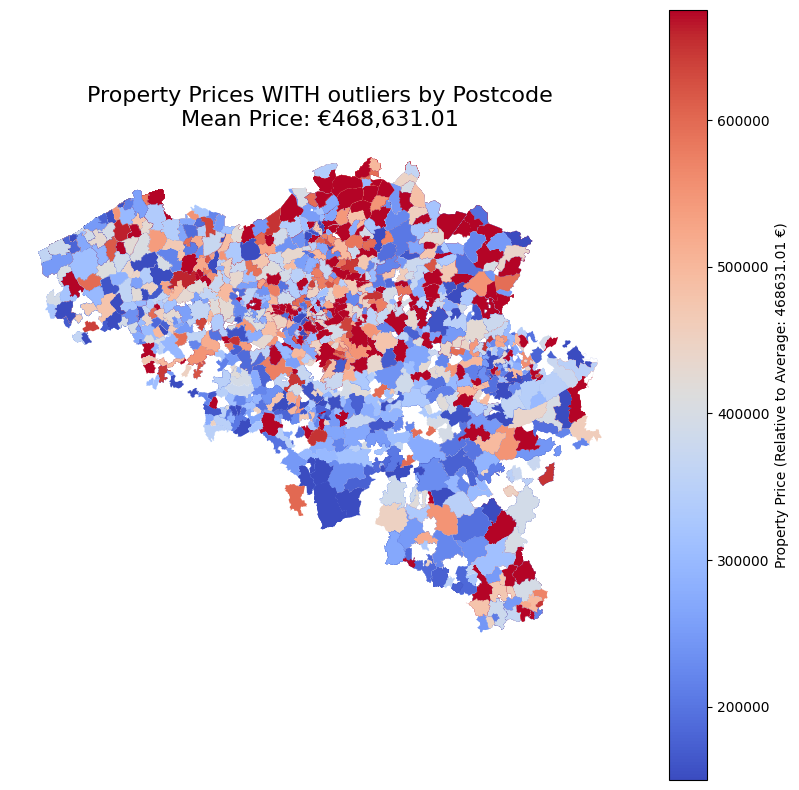

In [202]:
#Plot with outliers based on mean price property
mean_price_filtered = gdf['price'].mean()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {mean_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_with_outliers_price,
    vmax=vmax_with_outliers_price
)

# Add a title
plt.title(f"Property Prices WITH outliers by Postcode\nMean Price: €{mean_price_filtered:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("mean-price-with-outliers.jpg")

Index(['Join_Count', 'nouveau_PO', 'FREQUENCY', 'CP_speciau', 'Shape_Leng',
       'Shape_Area', 'geometry', 'postal_code', 'price', 'price_sqm',
       'livingArea'],
      dtype='object')


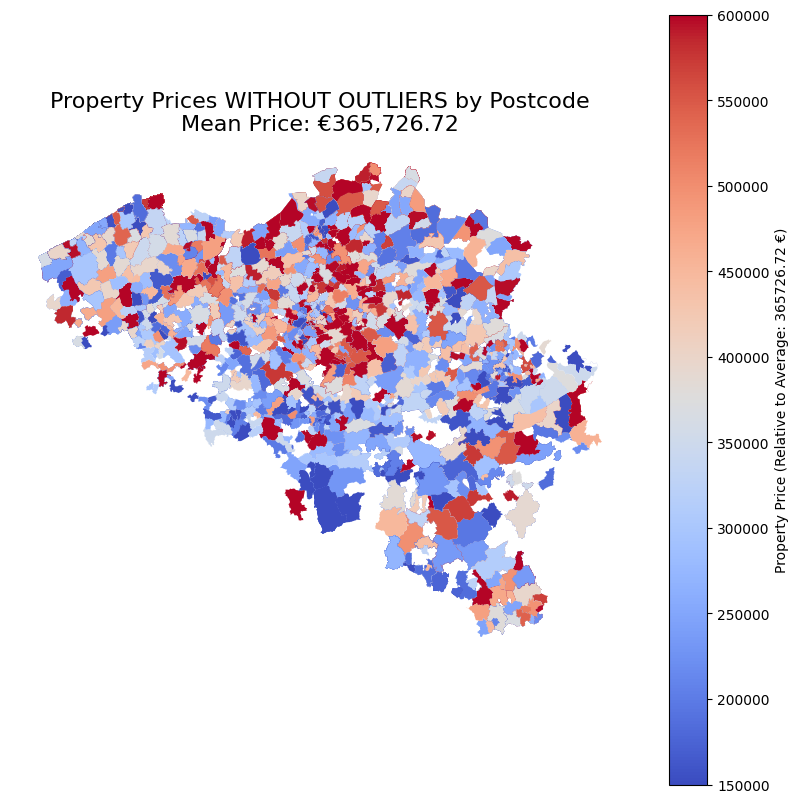

In [203]:
#Plot without outliers based on mean price property
mean_price_filtered = gdf_without_outliers['price'].mean()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_without_outliers.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {mean_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_without_outliers_price,
    vmax=vmax_without_outliers_price

)

# Add a title
plt.title(f"Property Prices WITHOUT OUTLIERS by Postcode\nMean Price: €{mean_price_filtered:,.2f}", fontsize=16)
plt.axis('off')

print(gdf_without_outliers.columns)
plt.savefig("mean-price-without-outliers.jpg")

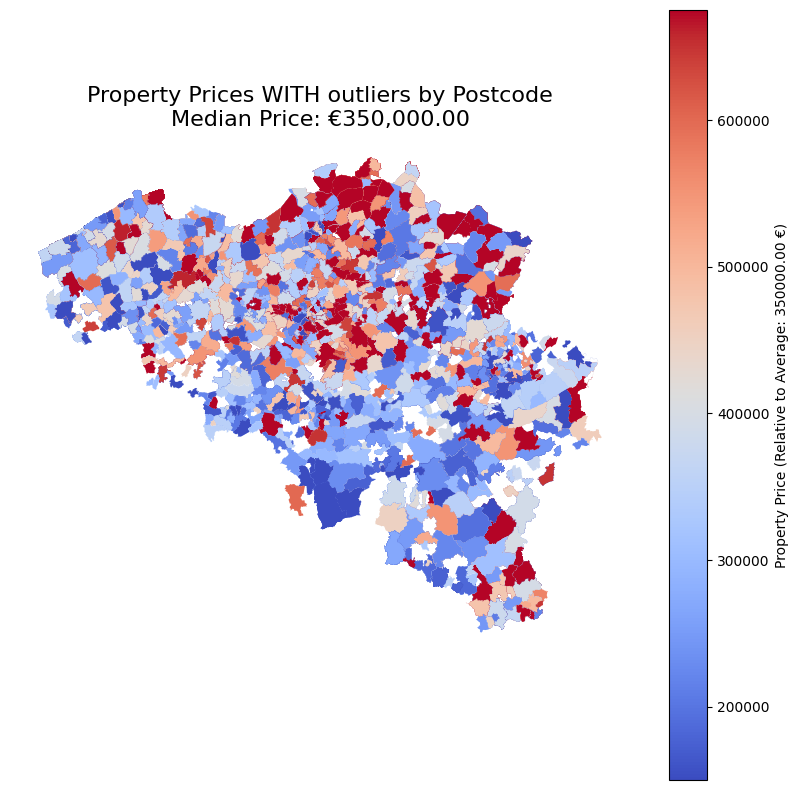

In [204]:
#Plot with outliers based on median price property
median_price_filtered = gdf['price'].median()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {median_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_with_outliers_price,
    vmax=vmax_with_outliers_price
)

# Add a title
plt.title(f"Property Prices WITH outliers by Postcode\nMedian Price: €{median_price_filtered:,.2f}", fontsize=16)
plt.axis('off')
plt.savefig("median-price-with-outliers.jpg")


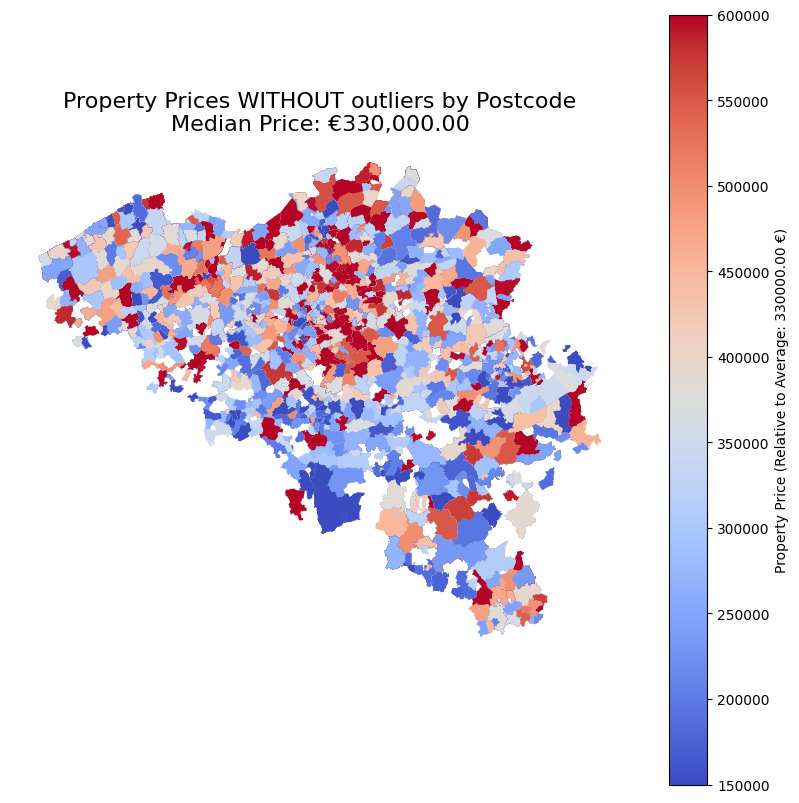

In [205]:
#Plot without outliers based on median price property
median_price_filtered = gdf_without_outliers['price'].median()

# Plot with legend and mean price in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_without_outliers.plot(
    column='price', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price (Relative to Average: {median_price_filtered:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_without_outliers_price,
    vmax=vmax_without_outliers_price
)

# Add a title
plt.title(f"Property Prices WITHOUT outliers by Postcode\nMedian Price: €{median_price_filtered:,.2f}", fontsize=16)
plt.axis('off')
plt.savefig("median-price-without-outliers.jpg")

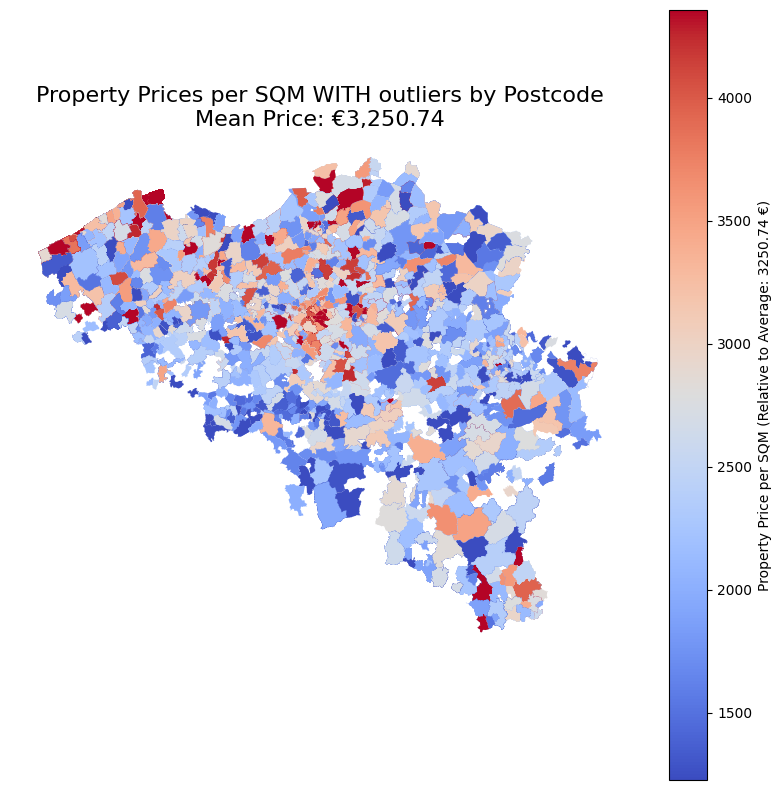

In [206]:
#Plot with outliers based on mean price per sqm per property
mean_price_sqm = gdf['price_sqm'].mean()

# Plot with legend and mean price_sqm in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price_sqm', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price per SQM (Relative to Average: {mean_price_sqm:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_with_outliers_sqm,
    vmax=vmax_with_outliers_sqm
)

# Add a title
plt.title(f"Property Prices per SQM WITH outliers by Postcode\nMean Price: €{mean_price_sqm:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("mean-price_sqm-with-outliers.jpg")

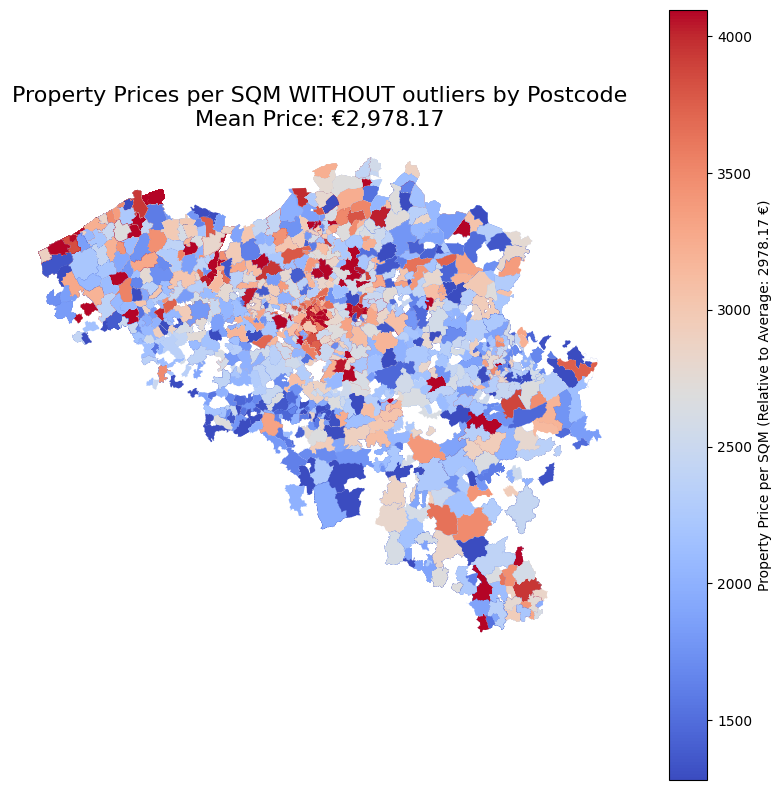

In [207]:
#Plot without outliers based on mean price per sqm per property
mean_price_sqm = gdf_without_outliers['price_sqm'].mean()

# Plot with legend and mean price_sqm in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_without_outliers.plot(
    column='price_sqm', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price per SQM (Relative to Average: {mean_price_sqm:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_without_outliers_sqm,
    vmax=vmax_without_outliers_sqm
)

# Add a title
plt.title(f"Property Prices per SQM WITHOUT outliers by Postcode\nMean Price: €{mean_price_sqm:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("mean-price_sqm-without-outliers.jpg")

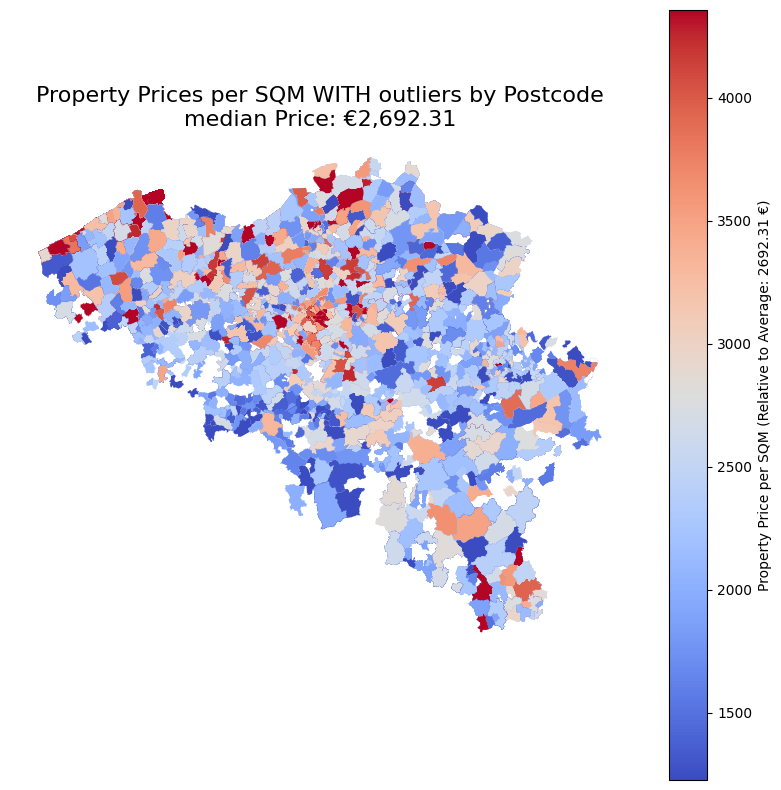

In [212]:
#Plot with outliers based on median price per sqm per property
median_price_sqm = gdf['price_sqm'].median()

# Plot with legend and median price_sqm in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column='price_sqm', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price per SQM (Relative to Average: {median_price_sqm:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_with_outliers_sqm,
    vmax=vmax_with_outliers_sqm
)

# Add a title
plt.title(f"Property Prices per SQM WITH outliers by Postcode\nmedian Price: €{median_price_sqm:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("median-price_sqm-with-outliers.jpg")

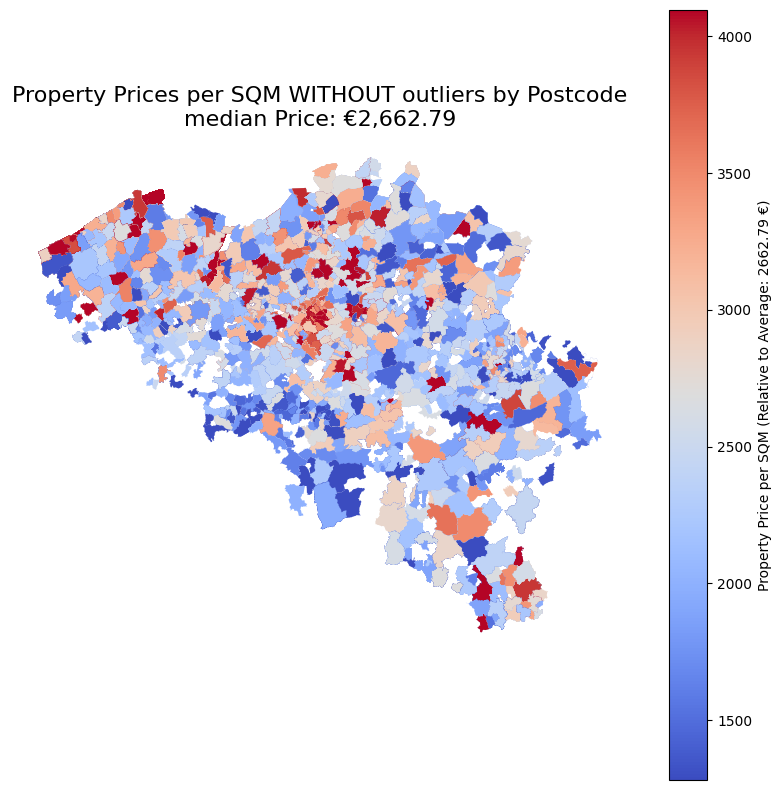

In [209]:
#Plot without outliers based on median price per sqm per property
median_price_sqm = gdf_without_outliers['price_sqm'].median()

# Plot without legend and median price_sqm in title
fig, ax = plt.subplots(figsize=(10, 10))

gdf_without_outliers.plot(
    column='price_sqm', 
    cmap='coolwarm', 
    legend=True,
    legend_kwds={'label': f"Property Price per SQM (Relative to Average: {median_price_sqm:.2f} €)"},
    ax=ax, 
    edgecolor=None,
    vmin=vmin_without_outliers_sqm,
    vmax=vmax_without_outliers_sqm
)

# Add a title
plt.title(f"Property Prices per SQM WITHOUT outliers by Postcode\nmedian Price: €{median_price_sqm:,.2f}", fontsize=16)
plt.axis('off')

plt.savefig("median-price_sqm-without-outliers.jpg")

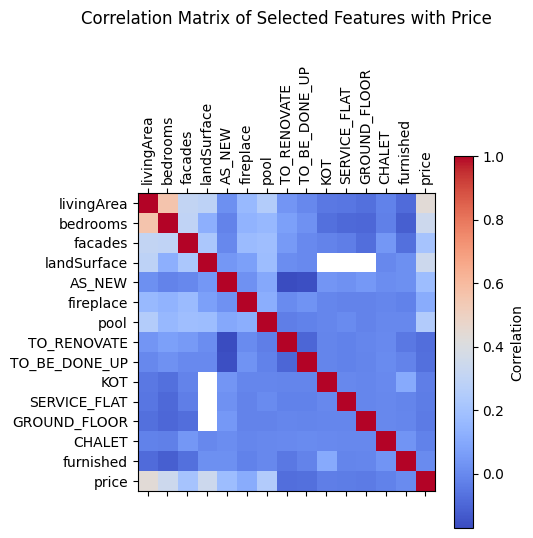

In [210]:
selected_columns = ['livingArea', 'bedrooms', 'facades', 'landSurface', 'AS_NEW', 'fireplace', 'pool', 'TO_RENOVATE', 'TO_BE_DONE_UP', 'KOT', 'SERVICE_FLAT', 'GROUND_FLOOR', 'CHALET', 'furnished']
correlation_matrix = df[selected_columns + ['price']].corr()
sorted_correlation = correlation_matrix['price'].sort_values(ascending=False)

plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Selected Features with Price', pad=30)

# Update tick labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

In [211]:
# Sort the DataFrame by price_sqm in descending order and get the top 5 unique localities
top_5_postcodes = df.sort_values('price_sqm', ascending=False).groupby('municipality_code').head(1).head(20)

# Print the localities and corresponding price_sqm
print(top_5_postcodes[['municipality_code', 'price_sqm', 'locality', 'postal_code']])


      municipality_code     price_sqm                    locality postal_code
9345              31043  39500.000000                Knokke-Zoute        8300
12084             21018  15961.538462        Woluwe-Saint-Lambert        1200
13853             11022  14570.552147                   Kalmthout        2920
14567             11002  13333.333333                   Antwerpen        2000
12559             31040  13112.244898                      Knokke        8211
1168              24062  12941.176471                      Leuven        3000
13757             38014  12434.210526               Oostduinkerke        8670
2851              44021  10869.565217                     Drongen        9031
13191             35013  10694.444444                    Oostende        8400
10347             38016  10597.826087                  Nieuwpoort        8620
2074              35029  10454.545455                     De Haan        8420
11931             83012  10454.545455                      Durbu